# Quickstart for laminar, non-Newtonian pipe flow

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rheopy/rheoflow/blob/master/notebooks/index.ipynb)

In [3]:
#!pip install git+https://github.com/rheopy/rheoflow.git

In [4]:
import rheoflow

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use(['dark_background'])
from IPython.display import display, Math, Latex

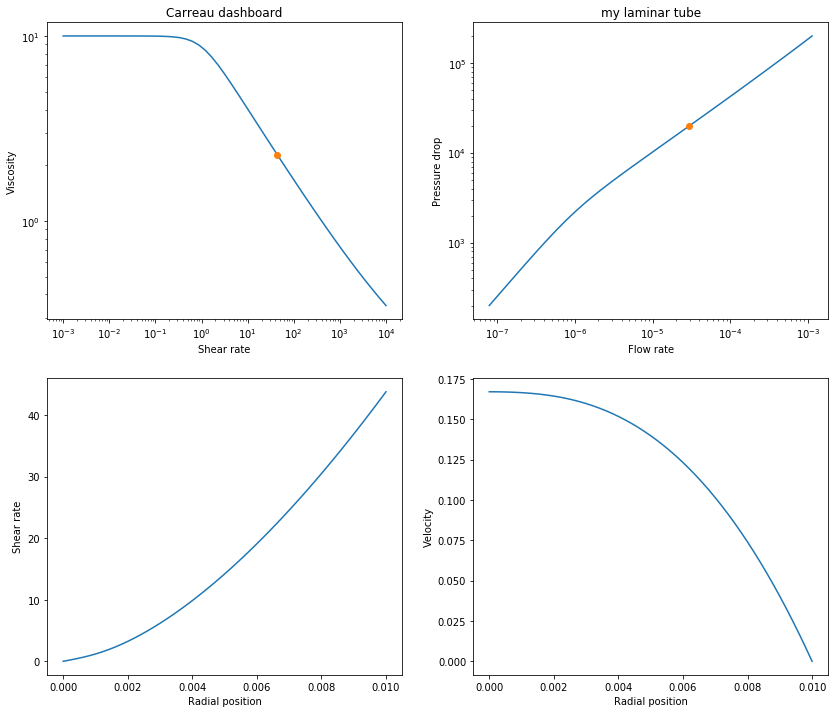

In [74]:
def tube_dashboard_plot(pressure_drop,radius,length,density,eta0,reltime,n):
    plt.figure(figsize=(14,12))
    viscosity = rheoflow.viscosity.carreau('Carreau dashboard',eta0=eta0,etainf=.1,reltime=reltime,a=2.0,n=n)
    pipe = rheoflow.pipe.laminar('my laminar tube',density=density,radius=radius,length=length,
                              viscosity=viscosity)
    pipe.pressure_drop = pressure_drop
    plt.subplot(221)
    viscosity.visc_plot()
    plt.plot(pipe.shear_rate_wall,pipe.viscosity_wall(),'o')
    plt.subplot(222)
    pipe.q_plot(pressure_drop_min=200.,pressure_drop_max=200000.)
    plt.plot(pipe.q,pipe.pressure_drop,'o')
    plt.subplot(223)
    pipe.shear_rate_plot()
    plt.subplot(224)
    pipe.vz_plot()
    
tube_dashboard_plot(pressure_drop=20000.,radius=.01,length=1.,density=1000.,eta0=10.,reltime=1.,n=.6)

## Nomenclature

This notebook provides deep examples for using rheopy for pipe flow.  Both tube and slit flow examples with a variety of viscosity models are provided.  SI units units are used everywhere.  For the variables used here, the units are:

$\eta = \left< Pas \right>$

$\sigma = \left< Pa \right>$

$\dot{\gamma} = \left< s^{-1} \right>$

$\Delta P = \left< Pa \right>$

$Q = \left< \frac{m^3}{s} \right>$

$v_z = \left< \frac{m}{s} \right>$

$length = \left< m \right>$

$radius = \left< m \right>$

## Calculation procedure

The rheopy.laminar notebook is intended to work with any viscosity model.  There are four elemenets of computation:

1. A viscosity model using the class structure provided - $\eta(\dot{\gamma})$
2. Shear rate calculation at any radial position (tube) or height (slit) - $\dot{\gamma}(r)$
3. Velocity calculation at any position - $v_z(r)$
4. Volumetric flow rate - $Q$, given $\Delta P$ (or vice versa)

## Details of calculations

### 1 - Viscosity model
Use pre-existing, or create new function with viscosity as a function of shear rate:

$\eta \left[ \dot{\gamma} \right]$

### 2 - Shear rate calculation ($\dot{\gamma}$)
The equation to be solved for shear rate at any radial position is

$\eta \left[ \dot{\gamma}(r) \right] \dot{\gamma}(r) = \frac{r}{2} \frac{\Delta P}{L}$,

where $\dot{\gamma}(r) = \frac{d v_z(r)}{dr}$

This equation is simply an equality of shear stress from constituitve model and shear stress from a momentum balance.  This calculation is numerical in rheopy because this equation does not always have analytical solutions.  The Carreau viscosity model is an example where an analytical solution does not yet exist.  

Note that 4 inputs are required: 
1. Viscosity model - $\eta(\dot{\gamma})$
2. Tube radius
3. Tube length
4. Pressure drop ($\Delta P$)

### 3 - Velocity calculation ($v_z$)
The axial velocity is calculated from the shear rate directly

$v_z(r) = -\int_{r}^{R} \dot{\gamma}(r)dr$

This integral is computed numerically beacuse the shear rate is computed numerically.

### 4 - Volumetric flow rate ($Q$)
The volumetric flow rate is computed by numerically integrating the velocity profile

$Q = 2\pi \int_{0}^{R} v_z(r)rdr$

Note that if Q is an input, then $\Delta P$ must be solved for iteratively.  

## Carreau viscosity model example

The Carreau viscosity model may be expressed with four parameters as:

$ \eta \left( \dot{\gamma} \right) = \eta_{\infty}+ \frac{\eta_0-\eta_{\infty}}{\left( \left( 1+\left(\lambda \dot{\gamma} \right)^a \right) \right)^{\frac{1-n}{n}}} $


In [61]:
my_carreau_model = rheoflow.viscosity.carreau('My first Carreau model',
                                   eta0=5.,etainf=.11,reltime=.02,a=1.3,n=.3)

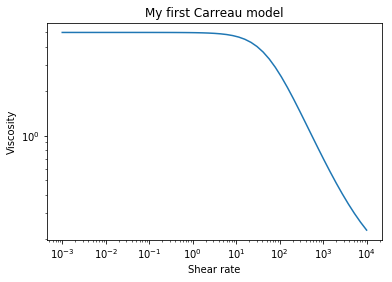

In [62]:
my_carreau_model.visc_plot()

## Laminar pipe flow - Carreau viscosity model

In [36]:
my_carreau_tube = rheoflow.pipe.laminar('my laminar flow pipe',density=1000.,
                               radius=.01,length=1.0,viscosity=my_carreau_model)

In [63]:
my_carreau_tube.pressure_drop = 20000.

In [64]:
print(my_carreau_tube)

Name =my laminar flow pipe
Radius =0.01
Length =1.0
Pressure drop =20000.0
Flow rate =1.782691971171862e-05
Shear rate wall = 23.673966897448867


### Shear rate calculation

In [65]:
my_carreau_tube.shear_rate_wall

23.673966897448867

In [66]:
my_carreau_tube.shear_stress_wall

100.0

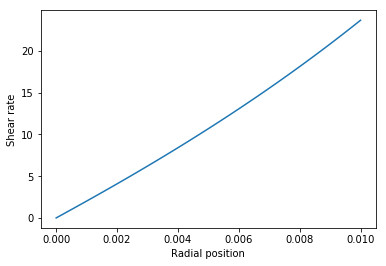

In [67]:
my_carreau_tube.shear_rate_plot()

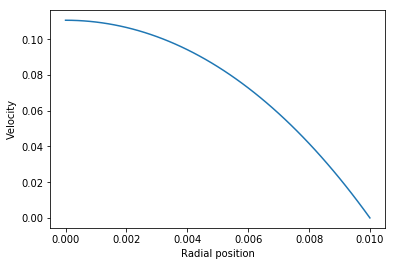

In [68]:
my_carreau_tube.vz_plot()

### Flow rate versus pressure drop

In [69]:
my_carreau_tube.q

1.782691971171862e-05

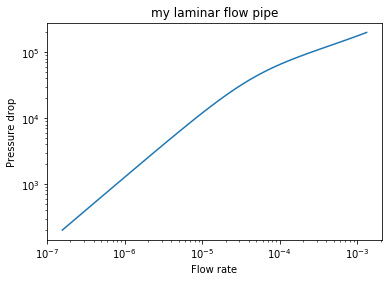

In [70]:
my_carreau_tube.q_plot(pressure_drop_min=200.,pressure_drop_max=200000.)